In [93]:
# นําเข้า Library ที่สําคัญสําหรับการใช้งานในโปรเจกต์ของเรา

import imblearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [94]:
# อ่านไฟล์ CSV และนําเข้าตัวแปร epileptic_seizure

epileptic_seizure = pd.read_csv('/content/epileptic_seizure_recognition.csv')

In [95]:
# โชว์ Data เฉพาะส่วนหัวจํานวน 5 Rows

epileptic_seizure.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [96]:
# โชว์ Data เฉพาะส่วนท้ายจํานวน 5 Rows

epileptic_seizure.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,...,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [97]:
# จํานวนข้อมูลของพฤติกรรมการตรวจลมบ้าหมูใน 5 ประเภท
# 1) 5 หมายถึง เวลาบันทึก EEG ของสมอง เวลาที่ผู้ป่วยลืมตาขึ้น
# 2) 4 หมายถึง เวลาบันทึก EEG ของสมอง เวลาที่ผู้ป่วยปิดตาลง
# 3) 3 หมายถึง ระบุตำแหน่งของเนื้องอกในสมองและบันทึกกิจกรรม EEG จากบริเวณสมองที่แข็งแรง
# 4) 2 หมายถึง บันทึก EEG จากบริเวณที่เกิดเนื้องอก
# 5) 1 หมายถึง  นทึกกิจกรรมชัก ในหมายเลขที่ 2, 3, 4 และ 5 เป็นกลุ่มที่ไม่เป็นโรคลมบ้าหมู เฉพาะหมายเลข 1 เท่านั้นที่เป็นโรคลมชัก

epileptic_seizure['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

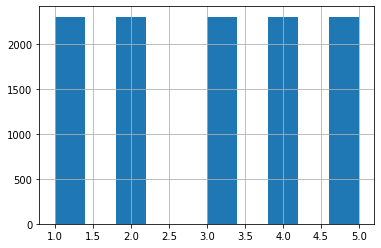

In [98]:
# สร้างกราฟของแต่ละ Classes แบบคร่าวๆ จะเห็นได้ว่าทุก กราฟนั้นมีข้อมูลเท่ากันหมด

epileptic_seizure.y.hist()

In [99]:
# เปลี่ยน Column ที่ y (เป็นการจัดประเภท Binary)

binary_dict = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
epileptic_seizure['y'] = epileptic_seizure['y'].map(binary_dict)

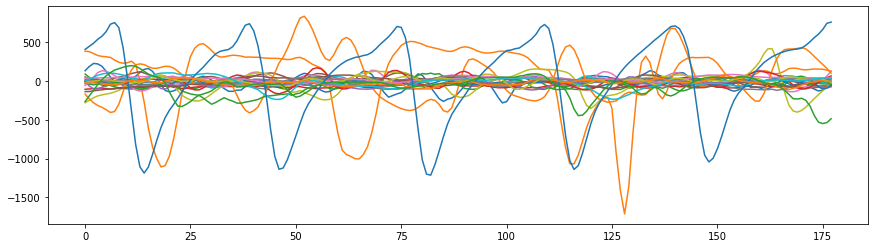

In [100]:
# สร้าง Plot เพื่อจําลองคลื่นสมองของผู้ป่วยและคนปกติ
# จะเห็นได้ว่าเส้นสีส้มและสีนํ้าเงินเป็นผู้ป่วยลมบ้าหมูจะเห็นว่าคลื่นสมองจะกว้างและไม่ถี่เหมือนคนปกตินั่นถือว่าเป็นสัญญาณอาการของคนชัก

plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(epileptic_seizure.values[i][1:-1]) for i in range(23)];

In [101]:
# ลบ Column Index ที่มีชื่อว่า Unnamed และสับเปลี่ยนข้อมูลของ CSV ที่เรานําเข้ามา

epileptic_seizure = epileptic_seizure.drop('Unnamed', axis=1)
epileptic_seizure = shuffle(epileptic_seizure)

In [102]:
# โชว์ข้อมูลส่วนหัว 5 Rows พร้อมการเปลี่ยนแปลง ที่ Column 0 Unnamed จะถูกลบหายออกไป

epileptic_seizure.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
5708,-27,-38,-46,-43,-43,-48,-42,-46,-45,-46,-27,-17,-9,-6,-6,-15,-20,-27,-32,-46,-51,-66,-80,-89,-95,-102,-101,-99,-92,-95,-93,-89,-87,-74,-61,-49,-40,-29,-17,-14,...,-56,-59,-62,-56,-52,-43,-35,-21,-14,-1,5,3,4,0,-4,-23,-22,-35,-39,-50,-58,-64,-67,-61,-71,-74,-80,-81,-82,-80,-75,-67,-67,-68,-57,-50,-44,-38,-39,0
6240,-54,-39,-42,-96,-132,-142,-152,-162,-155,-147,-156,-127,-80,-45,-53,-72,-75,-90,-91,-69,-49,-51,-50,-79,-110,-121,-105,-81,-75,-69,-69,-68,-69,-70,-83,-90,-93,-112,-129,-150,...,-62,-56,-45,-29,-14,-17,-31,-58,-45,-55,-84,-98,-87,-82,-93,-80,-110,-134,-111,-80,-83,-104,-92,-91,-89,-83,-88,-123,-139,-132,-110,-107,-130,-150,-147,-129,-89,-65,-62,0
9839,-42,-39,-34,-32,-32,-13,-2,3,-4,-5,-4,-4,10,19,22,18,27,40,45,48,31,15,7,10,-1,-6,-6,0,1,-9,-8,-4,16,41,57,60,45,21,-10,-21,...,106,92,68,40,14,-4,-23,-31,-29,-23,-24,-24,-17,-7,-1,11,31,40,35,40,39,36,26,14,0,-2,1,0,-14,-24,-29,-40,-43,-45,-45,-40,-37,-21,-12,0
6242,-39,-45,-39,-46,-52,-64,-66,-68,-62,-44,-31,-10,13,21,11,-6,-8,-15,-3,-5,-12,-32,-56,-61,-53,-34,-15,-7,-2,5,7,28,35,50,45,45,49,52,41,40,...,43,56,65,89,104,114,94,68,40,32,28,24,31,29,35,39,54,66,66,64,60,48,27,9,-15,-17,-7,-12,-11,-30,-51,-64,-73,-55,-52,-43,-36,-30,-22,0
2006,-18,-17,-31,-36,-56,-74,-88,-74,-52,-27,6,6,13,36,33,43,22,7,-26,-51,-65,-36,8,18,31,10,16,56,62,73,38,53,48,22,-19,-40,-29,-14,-16,-22,...,28,3,-8,-5,-14,-14,-29,-22,-9,1,20,4,-16,-51,-86,-53,-54,-44,-57,-82,-55,-31,-5,9,7,8,9,24,71,79,63,49,56,49,71,80,66,66,42,0


In [103]:
# สร้างสถิติเชิงบรรยายสําหรับ CSV ที่เรานําเข้า ไม่ว่าจะเปิด ค่าเฉลี่ยนหรือค่า ตํ่าสุดหรือน้อยสุด เป็นต้น ฯลฯ

epileptic_seizure.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [104]:
# แสดงข้อมูลเกี่ยวกับไฟล์ CSV ที่เราได้ทําการนําเข้ามาพยากรณ์

epileptic_seizure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 5708 to 9913
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8 MB


In [105]:
# แสดงผลตัวเลขจํานวนคนปกติและคนที่เป็นผู้ป่วย

print('Number of records of Non-Epileptic {0} vs Epileptic {1}'.format(len(epileptic_seizure[epileptic_seizure['y'] == 0]), len(epileptic_seizure[epileptic_seizure['y'] == 1])))

Number of records of Non-Epileptic 9200 vs Epileptic 2300


In [106]:
# สร้างสถิติเชิงบรรยายสําหรับคนปกติที่ไม่ได้เป็นอะไร

epileptic_seizure[epileptic_seizure['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [107]:
# สร้างสถิติเชิงบรรยายสําหรับคนที่เป็นผู้ป่วย

epileptic_seizure[epileptic_seizure['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [108]:
# แสดงผลค่า Mean และ Std สําหรับผู้ที่ไม่ป่วยและผู้ที่ป่วย

print('Total Mean VALUE for Epiletic: {}'.format((epileptic_seizure[epileptic_seizure['y'] == 1].describe().mean()).mean()))
print('Total Std VALUE for Epiletic: {}'.format((epileptic_seizure[epileptic_seizure['y'] == 1].describe().std()).std()))

print('Total Mean VALUE for NON Epiletic: {}'.format((epileptic_seizure[epileptic_seizure['y'] == 0].describe().mean()).mean()))
print('Total Std VALUE for NON Epiletic: {}'.format((epileptic_seizure[epileptic_seizure['y'] == 0].describe().std()).std()))

Total Mean VALUE for Epiletic: 290.12936095888404
Total Std VALUE for Epiletic: 53.56315864740058
Total Mean VALUE for NON Epiletic: 1260.0989272626161
Total Std VALUE for NON Epiletic: 15.561044289100964


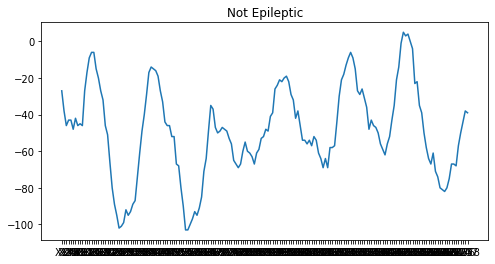

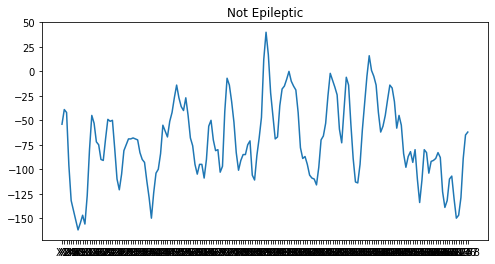

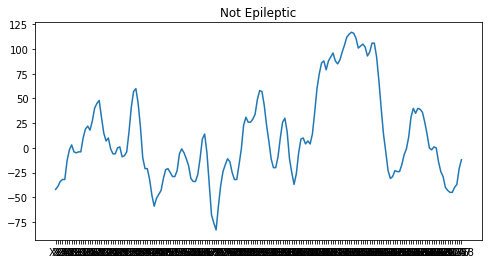

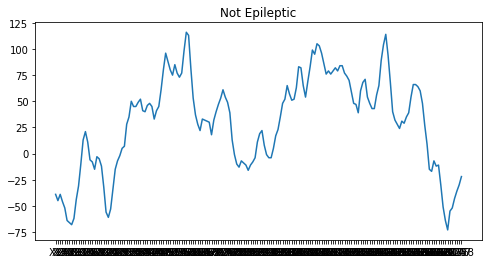

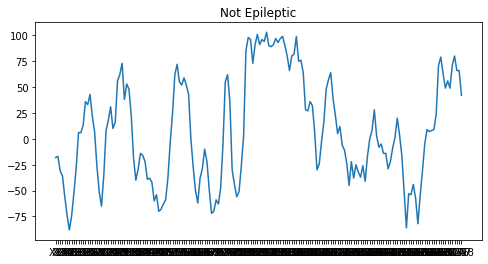

In [109]:
# สร้างกราฟจําลองคลื่นสมองมนุษย์สําหรับผู้ที่ไม่ได้ป่วยลมบ้าหมู

[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(epileptic_seizure[epileptic_seizure['y'] == 0].iloc[i][0:-1])) for i in range(5)];

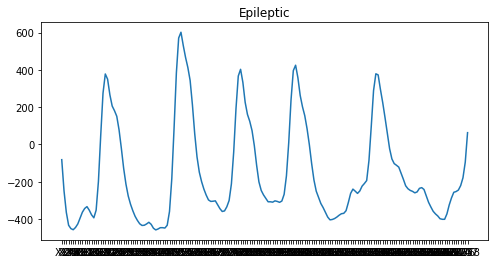

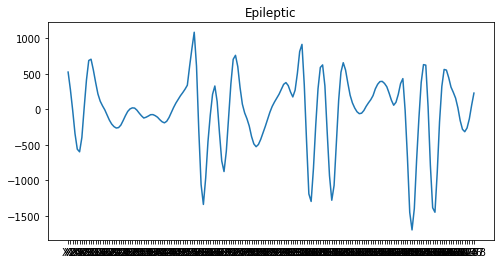

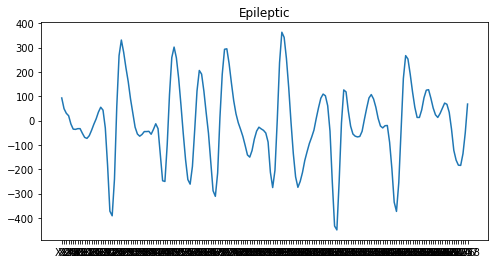

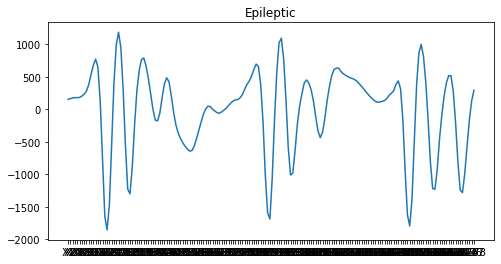

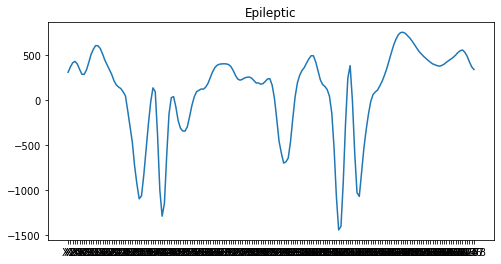

In [110]:
# สร้างกราฟจําลองคลื่นสมองมนุษย์สําหรับผู้ที่ป่วยเป็นลมบ้าหมู

[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(epileptic_seizure[epileptic_seizure['y'] == 1].iloc[i][0:-1])) for i in range(5)];

In [111]:
# ทำให้ข้อมูลเป็นมาตรฐานและป้องกันปัญหาที่ไม่สมดุล

oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
x, y = oversample.fit_resample(epileptic_seizure.drop('y', axis=1), epileptic_seizure['y'])

In [112]:
# แสดงผลค่า Shape ของ x และ y

x.shape, y.shape

((18400, 178), (18400,))

In [113]:
# แสดงผลจํานวนผู้ที่ป่วยและผู้ที่ไม่ป่วย

print('Number of records of Non-Epileptic {0} vs Epileptic {1}'.format(len(y == True), len(y == False)))

Number of records of Non-Epileptic 18400 vs Epileptic 18400


In [114]:
# ประกาศตัวแปรเพื่อสร้าง DataFrame ของตัวแปร x และทําการ Normalization มัน

normalized = pd.DataFrame(normalize(x))

In [115]:
# แสดงผลค่าของใน DataFrame

normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,-0.036793,-0.051782,-0.062684,-0.058596,-0.058596,-0.065409,-0.057233,-0.062684,-0.061321,-0.062684,-0.036793,-0.023166,-0.012264,-0.008176,-0.008176,-0.020440,-0.027254,-0.036793,-0.043606,-0.062684,-0.069497,-0.089938,-0.109016,-0.121280,-0.129456,-0.138995,-0.137632,-0.134907,-0.125368,-0.129456,-0.126731,-0.121280,-0.118554,-0.100839,-0.083124,-0.066772,-0.054508,-0.039518,-0.023166,-0.019078,...,-0.068135,-0.076311,-0.080399,-0.084487,-0.076311,-0.070860,-0.058596,-0.047694,-0.028617,-0.019078,-0.001363,0.006813,0.004088,0.005451,0.000000,-0.005451,-0.031342,-0.029979,-0.047694,-0.053145,-0.068135,-0.079036,-0.087212,-0.091300,-0.083124,-0.096751,-0.100839,-0.109016,-0.110378,-0.111741,-0.109016,-0.102202,-0.091300,-0.091300,-0.092663,-0.077674,-0.068135,-0.059959,-0.051782,-0.053145
1,-0.049483,-0.035738,-0.038487,-0.087970,-0.120958,-0.130122,-0.139285,-0.148449,-0.142034,-0.134703,-0.142951,-0.116376,-0.073308,-0.041236,-0.048567,-0.065977,-0.068726,-0.082472,-0.083388,-0.063228,-0.044901,-0.046734,-0.045818,-0.072392,-0.100799,-0.110878,-0.096217,-0.074224,-0.068726,-0.063228,-0.063228,-0.062312,-0.063228,-0.064145,-0.076057,-0.082472,-0.085221,-0.102631,-0.118209,-0.137453,...,-0.038487,-0.056814,-0.051316,-0.041236,-0.026574,-0.012829,-0.015578,-0.028407,-0.053148,-0.041236,-0.050399,-0.076973,-0.089802,-0.079722,-0.075141,-0.085221,-0.073308,-0.100799,-0.122791,-0.101715,-0.073308,-0.076057,-0.095300,-0.084304,-0.083388,-0.081555,-0.076057,-0.080639,-0.112711,-0.127373,-0.120958,-0.100799,-0.098049,-0.119126,-0.137453,-0.134703,-0.118209,-0.081555,-0.059563,-0.056814
2,-0.067135,-0.062340,-0.054348,-0.051151,-0.051151,-0.020780,-0.003197,0.004795,-0.006394,-0.007992,-0.006394,-0.006394,0.015985,0.030371,0.035166,0.028772,0.043159,0.063939,0.071931,0.076726,0.049552,0.023977,0.011189,0.015985,-0.001598,-0.009591,-0.009591,0.000000,0.001598,-0.014386,-0.012788,-0.006394,0.025575,0.065537,0.091112,0.095908,0.071931,0.033568,-0.015985,-0.033568,...,0.169437,0.169437,0.147059,0.108696,0.063939,0.022378,-0.006394,-0.036765,-0.049552,-0.046355,-0.036765,-0.038363,-0.038363,-0.027174,-0.011189,-0.001598,0.017583,0.049552,0.063939,0.055946,0.063939,0.062340,0.057545,0.041560,0.022378,0.000000,-0.003197,0.001598,0.000000,-0.022378,-0.038363,-0.046355,-0.063939,-0.068734,-0.071931,-0.071931,-0.063939,-0.059143,-0.033568,-0.019182
3,-0.053701,-0.061962,-0.053701,-0.063339,-0.071601,-0.088124,-0.090878,-0.093632,-0.085370,-0.060585,-0.042685,-0.013769,0.017900,0.028916,0.015146,-0.008262,-0.011016,-0.020654,-0.004131,-0.006885,-0.016523,-0.044062,-0.077109,-0.083994,-0.072978,-0.046816,-0.020654,-0.009639,-0.002754,0.006885,0.009639,0.038554,0.048193,0.068847,0.061962,0.061962,0.067470,0.071601,0.056455,0.055078,...,0.059209,0.059209,0.077109,0.089501,0.122548,0.143202,0.156971,0.129433,0.093632,0.055078,0.044062,0.038554,0.033047,0.042685,0.039931,0.048193,0.053701,0.074355,0.090878,0.090878,0.088124,0.082617,0.066093,0.037177,0.012392,-0.020654,-0.023408,-0.009639,-0.016523,-0.015146,-0.041308,-0.070224,-0.088124,-0.100517,-0.075732,-0.071601,-0.059209,-0.049570,-0.041308,-0.030293
4,-0.025879,-0.024442,-0.044570,-0.051759,-0.080514,-0.106393,-0.126522,-0.106393,-0.074763,-0.038819,0.008626,0.008626,0.018691,0.051759,0.047446,0.061823,0.031630,0.010064,-0.037381,-0.073325,-0.093454,-0.051759,0.011502,0.025879,0.044570,0.014377,0.023004,0.080514,0.089140,0.104955,0.054634,0.076201,0.069012,0.031630,-0.027317,-0.057510,-0.041695,-0.020128,-0.023004,-0.031630,...,0.011502,0.040257,0.004313,-0.011502,-0.007189,-0.020128,-0.020128,-0.041695,-0.031630,-0.012940,0.001438,0.028755,0.005751,-0.023004,-0.073325,-0.123646,-0.076201,-0.077638,-0.063261,-0.081952,-0.

In [116]:
# ประกาศตัวแปร normalized ใน column y ให้เป็น ตัวแปร y และแสดงผลค่า Mean และ Std ของผู้ที่ป่วยและไม่ป่วย

normalized['y'] = y

print('Normalized Total Mean VALUE for Epiletic: {}'.format((normalized[normalized['y'] == 1].describe().mean()).mean()))
print('Normalized Total Std VALUE for Epiletic: {}'.format((normalized[normalized['y'] == 1].describe().std()).std()))

print('Normalized Total Mean VALUE for NOT Epiletic: {}'.format((normalized[normalized['y'] == 0].describe().mean()).mean()))
print('Normalized Total Std VALUE for NOT Epiletic: {}'.format((normalized[normalized['y'] == 0].describe().std()).std()))

Normalized Total Mean VALUE for Epiletic: 1150.0133318356786
Normalized Total Std VALUE for Epiletic: 0.022565249182846223
Normalized Total Mean VALUE for NOT Epiletic: 1150.0065271687788
Normalized Total Std VALUE for NOT Epiletic: 0.0020074295510300252


In [117]:
# แบ่งชุดข้อมูลของเราบนรถไฟและทดสอบและเรียกใช้วิธีการตรวจสอบความถูกต้อง

x = normalized.drop('y', axis=1)
y = normalized['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

check_shapes = x_train, x_test, y_train, y_test

In [118]:
# ลองเรียกใช้งานค่าต่างๆ เพื่อตรวจเช็คความถูกต้อง

[arr.shape for arr in check_shapes]

[(12880, 178), (5520, 178), (12880,), (5520,)]

In [119]:
# สร้างฟังก์ชั่นสําหรับรับค่า Dimensions และ Input_Shape เพื่อนําไปสร้าง ML Model เพื่อนําไป Train

def keras_dense_block(dimensions, input_shape):
    block = tf.keras.layers.BatchNormalization() (input_shape)
    block = tf.keras.layers.Dense(dimensions, activation=tf.keras.layers.LeakyReLU(0.2)) (block)
    block = tf.keras.layers.Dropout(0.4) (block)
    block = tf.keras.layers.Dense(dimensions, activation=tf.keras.layers.LeakyReLU(0.2)) (block)
    block = tf.keras.layers.Dropout(0.4) (block)
    block = tf.keras.layers.Dense(dimensions, activation=tf.keras.layers.LeakyReLU(0.2)) (block)
    block = tf.keras.layers.Dropout(0.4) (block)
    block = tf.keras.layers.Dense(178, activation=tf.keras.layers.LeakyReLU(0.2)) (block)

    return block

In [120]:
# ประกาศรับค่า input, shape ของ dataset เราและประกาศตัวแปร first_block, second_block, third_block เพื่อรับค่าของ Dims ที่ต่างกันและนําไป
# Concatenate หรือว่ารวมกันและนําไปต่อกับ Dense ชุดสุดท้ายพร้อม activation เป็น sigmoid เพื่อปรับใช้กับ Dataset ของเรา และนําตัวแปร input และ output
# ไปใส่ใน model เพื่อพร้อมทําการ Train Model ต่อไป

input = tf.keras.layers.Input(shape=(178, ), name='input')
first_block = keras_dense_block(256, input)
second_block = keras_dense_block(512, input)
third_block = keras_dense_block(1024, input)

concatenated = tf.keras.layers.Concatenate()([first_block, second_block, third_block])
concatenated = tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(0.2)) (concatenated)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output') (concatenated)

model = tf.keras.models.Model(input, output)

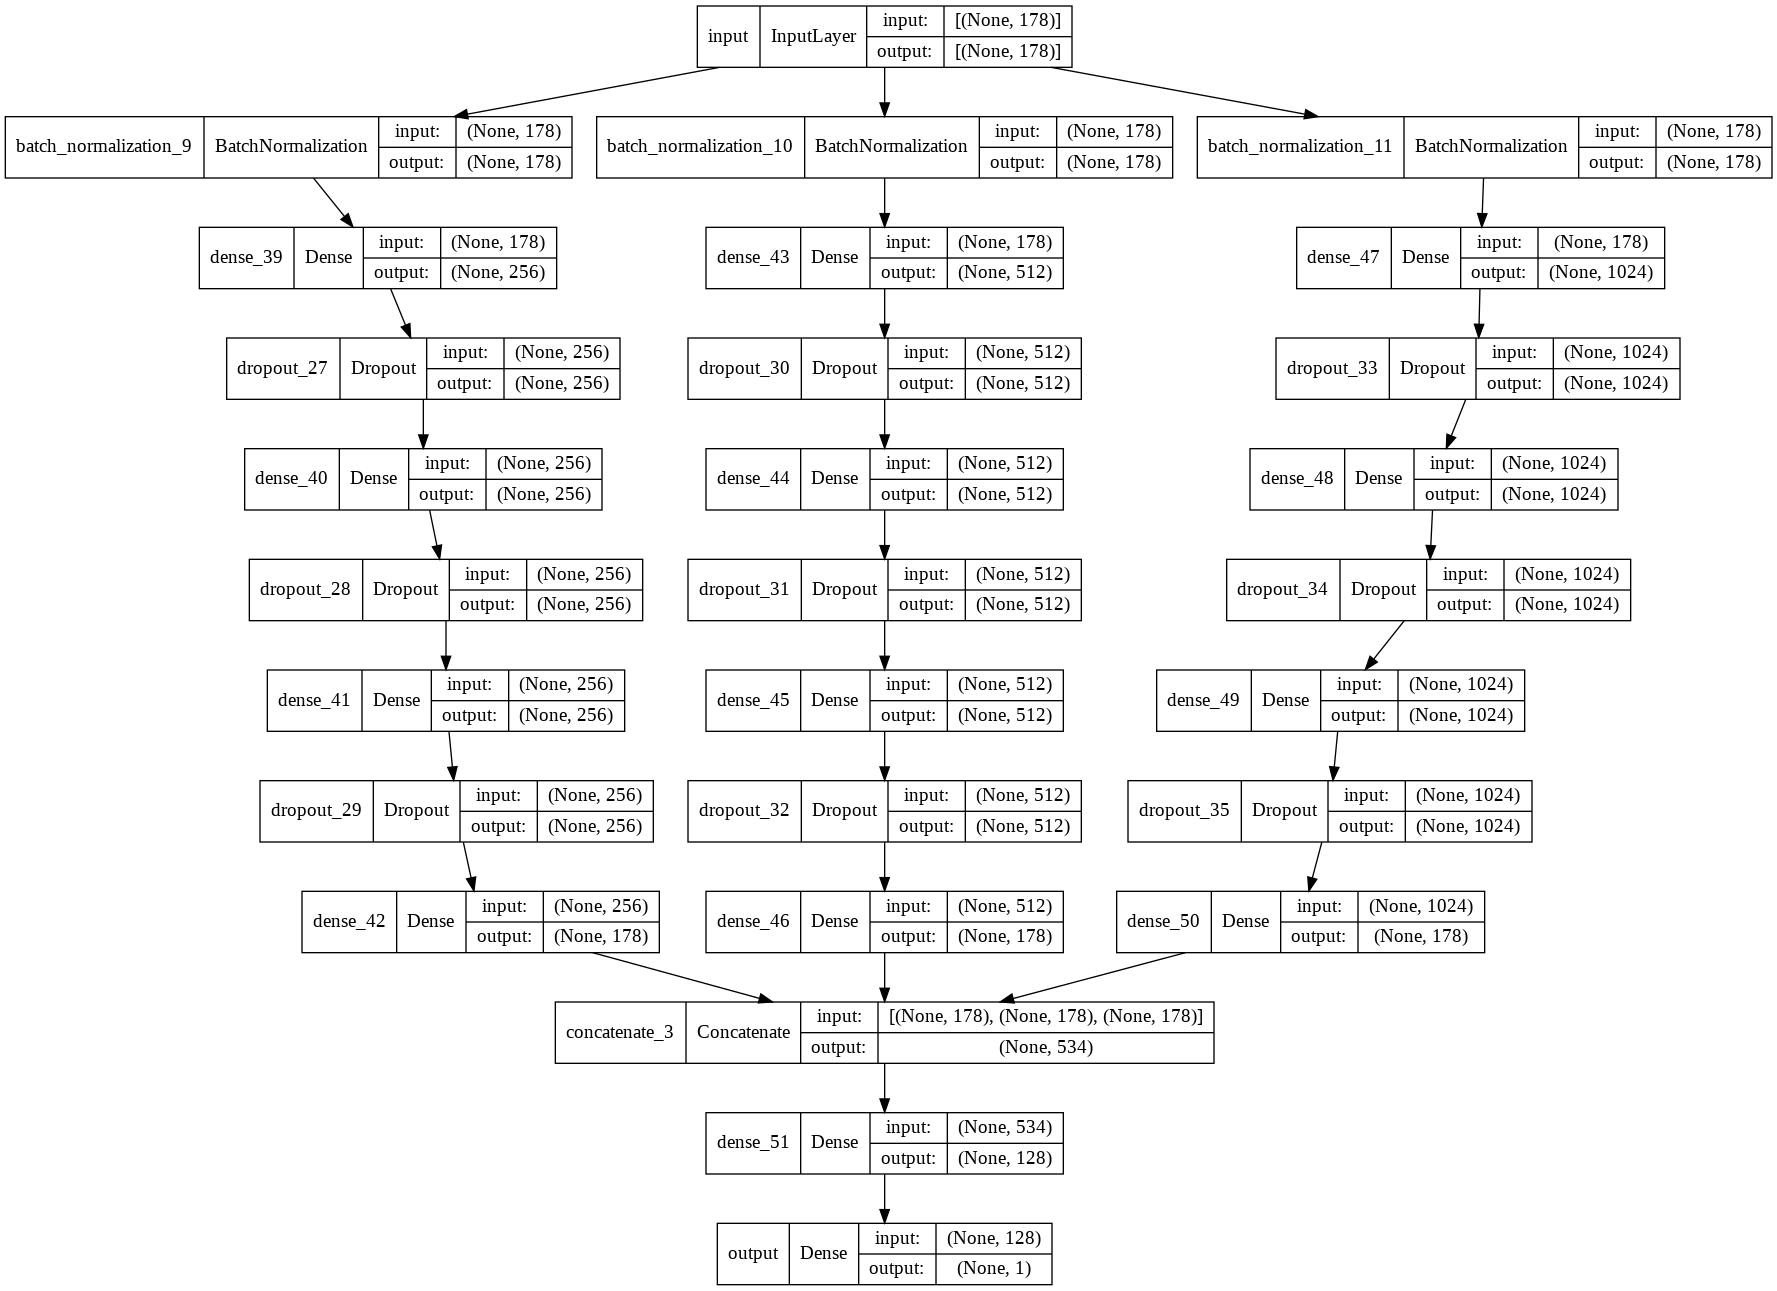

In [121]:
# แสดง Plot จุดเชื่อมโยงต่างๆ ของ Architecture ที่เราสร้างขึ้นเพื่อ Train Model ของเรา

tf.keras.utils.plot_model(model, show_shapes=True)

In [122]:
# ทําการ Compile ตัว Model และเลือก Loss Method เป็น Binary เพราะเนื่องจากเราได้ทําการแปลงการบันทึก EEG ของเราเป็น Binary แล้วต่อไปเราก็รับ optimizer เป็น Adam 
# จากนั้นก็ทําการ summary() เพื่อเช็คค่าต่างๆ และความถูกต้องใน Architecture ของเราที่สร้างขึ้นมา Train Model 
# และอย่างต่อไปคือ modelCheckpoint คือการ checkpoint ตามชื่อเลย เมื่อ val_accuracy เต็มที่ในการ Prediction แล้ว การ fit ข้อมูลจะทําการหยุดและ Save จะไม่มีการ Prediction ต่อเพราะเนื่องจากการ เรียนรู้นั้นเต็มที่แล้ว
# model.fit เป็นการนําเข้าข้อมูลทุกอย่างมาประมวลผลและมี option เข้ามาอีกนั่นก็คือ epochs คือรอบในการเรียนรู้ของ ML Model และ Batch Size เป็น Hyperparameter ไว้สําหรับปรับจูนในการ Train Model ของเราซึ่งแนะนําว่าอย่าปรับสูงกว่า 32 (https://www.bualabs.com/archives/729/what-is-batch-size-in-deep-neural-networks-how-to-adjust-machine-learning-model-accuracy-deep-learning-hyperparameter-tuning-ep-2/)
# validation_split คือการ แบ่งการ prediction และการ Validation ซึ่งในที่นี้คือเราปรับเป็น 0.2 นั่นก็คือ Predict 80% และ Valid 20%
# callbacks เป็นตัวส่งข้อมูลให้ ตัวแปร model_checkpoint_callback ที่ทํางานอยู่เพื่อป้องกัน การ Train เกินทรัพยากรณ์

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)
model.summary()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weight_only=True,
    monitor='val_accuarcy',
    mode='max',
    save_best_only=True
)

history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[model_checkpoint_callback])

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 178)]        0           []                               
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 178)         712         ['input[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 178)         712         ['input[0][0]']                  
 ormalization)                                                                                    
                                                                                            

173/173 [==============================] - 2s 11ms/step - loss: 0.2890 - accuracy: 0.8757
Evaluate on the test data
Test-loss, Test-accuracy:  [0.28897732496261597, 0.8757246136665344]


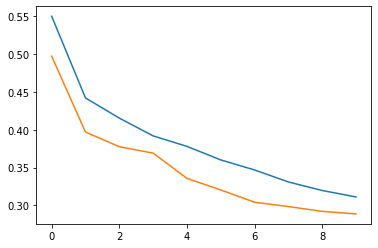

In [123]:
# ทําการ Save Model เพื่อสามารถนําไปใช้ต่อได้ในงานอื่นๆ เช่นนําไปใช้งานในการตรวจจับลมบ้าหมู ในนาฬิกาหรือในรถยนต์ เป็นต้น ฯลฯ ขึ้นอยู่กับผู้ที่จะนําไปใช้งาน
# และทําการสรุปผลรวมของการ Train Model และแสดงออกมาเป็นความแม่นยําในการ Train ซึ่งถ้าสูงกว่า 90% ถือว่าดี

model.save('epileptic_seizures.h5')
results = model.evaluate(x_test, y_test, batch_size=32)

print('\nEvaluate on the test data')
print("Test-loss, Test-accuracy: ", results)

loss_train = np.array(history.history['loss'])
loss_test = np.array(history.history['val_loss'])

x = np.arange(0, loss_train.shape[0])
plt.plot(x, loss_train, label="Training loss")
plt.plot(x, loss_test, label="Validation loss")